In [ ]:
# label = 1
# def getMasksOfWantedClass(outputs, label):
#   predicted_classes = outputs['instances'].predicted_classes
#   predicted_classes = predicted_classes.to('cpu').tolist()
#   is_wanted_class = [x==label for x in predicted_classes]

#   masks = outputs['instances'].pred_masks[is_wanted_class]
#   masks  = mask.to('cpu').numpy()
#   return masks

# def showMasks(masks, scale=256):
#   for m in masks:
#     cv2_imshow(m)

# def saveMasks(masks, scale=1, prefix = "./bin_masks/mask"):
#   i = 1
#   for m in masks:
#     filename = prefix + str(i) + ".png"
#     cv2.imwrite(filename, m*scale)

# masks = getMasksOfWantedClass(outputs, label)
# showMasks(masks)
# saveMasks(masks, scale=256)

In [ ]:
#https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html

In [ ]:
!unzip "/content/wszystkie.zip"

In [ ]:
! mkdir binary_masks
! cp -a /content/binarne/amorphous/. /content/binary_masks
! cp -a /content/binarne/normal/. /content/binary_masks
! cp -a /content/binarne/pyrioform/. /content/binary_masks
! cp -a /content/binarne/tapered/. /content/binary_masks

cp: cannot stat '/content/binarne/amorphous/.': No such file or directory
cp: cannot stat '/content/binarne/normal/.': No such file or directory
cp: cannot stat '/content/binarne/pyrioform/.': No such file or directory
cp: cannot stat '/content/binarne/tapered/.': No such file or directory


In [ ]:
import numpy as np
import cv2 as cv
import os
from google.colab.patches import cv2_imshow
images = '/content/wszystkie'

In [ ]:
import pandas as pd
def get_class_num(filename):
  mapper = {
      'normal': 1,
      'tapered': 2,
      'amorphous': 3,
      'pyriform': 4
  }

  for k, v in mapper.items():
    if k in filename:
      return v


In [ ]:
dane = []
photo_number = []
hu_moments = []
Y= [] 

for image in os.listdir(images): 
  # print(image)
  if image.endswith(".png"):
    path = f'{images}/{image}'
    # print(path)
    img = cv.imread(path)
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    cnt = contours[0]
    area = cv.contourArea(cnt)
    perimeter = cv.arcLength(cnt,True)
    epsilon = 0.1*cv.arcLength(cnt,True) # maximum distance from contour to approximated contour.
    k = cv.isContourConvex(cnt)
    convexity = int(k)
    x,y,w,h = cv.boundingRect(cnt)
    narowness = w/h
    (a, b),radius = cv.minEnclosingCircle(cnt)
    radius = int(radius)
    (e, f), (MA, ma), angle = cv.fitEllipse(cnt)
    elipticity  = MA/ma
    M = cv.HuMoments(cv.moments(imgray))
    H0 = M[0][0]
    H1 = M[1][0]
    H2 = M[2][0]
    H3 = M[3][0]
    H4 = M[4][0]
    H5 = M[5][0]
    H6 = M[6][0]
    class_number = get_class_num(image)
    Y.append(class_number)
    print(len(Y), image)
    data = [area, perimeter, epsilon, convexity, narowness, radius, elipticity, H0, H1, H2, H3, H4, H5, H6]
    dane.append(data)
    photo_number.append(image)


In [ ]:
df = pd.DataFrame(dane, columns = ['area', 'perimeter', 'epsilon', 'convexity', "narowness", "radius", "elipticity", "H0", "H1", "H2", "H3", "H4", "H5", "H6"])
df["Class"] = Y
df["Photo"] = photo_number
df

In [ ]:

print(min(df['H6']))
print(max(df['H6']))
print(min(df['H2']))
print(max(df['H2']))
print(min(df['H3']))
print(max(df['H3']))
print(min(df['H4']))
print(max(df['H4']))


-7.963500406848986e-22
2.4787156866885637e-21
7.508530116943928e-15
2.6302785268302945e-10
4.032563640688013e-16
1.101789758299741e-10
-1.1437983199425793e-24
1.779648745871724e-20


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = df.iloc[:,0:13] 
Y = df.iloc[:,-2]

mi_selector = SelectKBest(mutual_info_classif, k='all')
mi_fit=mi_selector.fit(X, Y)
dfscores_mi = pd.DataFrame(mi_fit.scores_)
dfcolumns_mi = pd.DataFrame(X.columns)
dfpvalues_mi = pd.DataFrame(mi_fit.pvalues_)
print(dfpvalues_mi)
featureScores_mi = pd.concat([dfcolumns_mi,dfscores_mi],axis=1)
featureScores_mi.columns = ['Cecha','Wynik'] 
feature_vectors = featureScores_mi.nlargest(14,'Wynik')
print(feature_vectors) 
feature_vectors.to_csv("/content/tapered_normal.csv")

Empty DataFrame
Columns: []
Index: []
         Cecha     Wynik
7           H0  0.462115
8           H1  0.424101
6   elipticity  0.388179
5       radius  0.332843
2      epsilon  0.229808
1    perimeter  0.224782
0         area  0.164205
4    narowness  0.143832
12          H5  0.072834
9           H2  0.057406
3    convexity  0.000000
10          H3  0.000000
11          H4  0.000000


In [ ]:
# Contour Area
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnt = contours[0]
area = cv.contourArea(cnt)
area

973.5

In [ ]:
# Contour Perimeter
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
perimeter = cv.arcLength(cnt,True)
perimeter

124.46803629398346

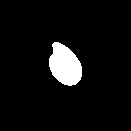

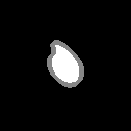

12.446803629398346

In [ ]:
# Contour Approximation
import imutils
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
cnts = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv.contourArea)
cnt = cnts[0]
epsilon = 0.1*cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt,epsilon,True)
epsilon # maximum distance from contour to approximated contour.
cv2_imshow(thresh)
output = imgray.copy()
cv.drawContours(output, [c], -1, (134, 255, 134), 3)
(x, y, w, h) = cv.boundingRect(c)
text = "original, num_pts={}".format(len(c))
# show the original contour image
cv2_imshow(output)
epsilon

12.446803629398346


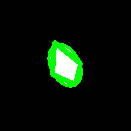

In [ ]:
# approximate the contour
epsilon = 0.1*cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt,epsilon,True)
print((epsilon))
# draw the approximated contour on the image
output = image.copy()
cv.drawContours(output, [approx], -1, (0, 255, 0), 3)
# show the approximated contour image
cv2_imshow(output)


In [ ]:
# Checking Convexity
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
k = cv.isContourConvex(cnt)
int(k)

0

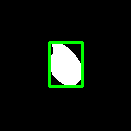

In [ ]:
# Bounding Rectangle Straight Bounding Rectangle
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnt = contours[0]
x,y,w,h = cv.boundingRect(cnt)
narowness = w/h
rect = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(rect)



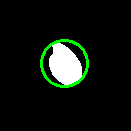

In [ ]:
# Minimum Enclosing Circle
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
circle = cv.circle(img,center,radius,(0,255,0),2)
cv2_imshow(circle)

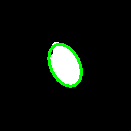

In [ ]:
# Fitting an Ellipse
img = cv.imread("/content/wszystkie/amorphous_0.png.png")
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
(x, y), (MA, ma), angle = cv.fitEllipse(cnt)
# elipse = cv.ellipse(img,cnt,(0,255,0),2)

image = img
center_coordinates = (x,y)
axesLength = MA
# elipse = cv.ellipse(image, center_coordinates, axesLength)

elipticity  = MA/ma
ellipse = cv.fitEllipse(cnt)
ellipse = cv.ellipse(img,ellipse,(0,255,0),2)
cv2_imshow(ellipse)

# SVM

In [ ]:
# Podział danych

test_to_all_split = 0.2

limit = int(len(df)*test_to_all_split)
x_test = df.iloc[:limit,:-2]
y_test = df.iloc[:limit,-2]
x_train = df.iloc[limit:,:-2]
y_train = df.iloc[limit:,-2]

In [ ]:
len(x_train)

138

In [ ]:
# MIESZANIE DANYCH
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

In [ ]:
# PCA
czy_robic_PCA = True

if czy_robic_PCA:
  from sklearn.decomposition import PCA

  pca = PCA(0.9)
  pca.fit(x_train)
  pca.n_components_

  X_train_pca = pca.transform(x_train)
  X_test_pca = pca.transform(x_test)

In [ ]:
# FUNKCJE DO TESTOWANIA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

def evaluate_on_set(x_test, y_test, pca_model, end_model):
  if pca_model is not None:
    # PCA
    X_test_pca = pca_model.transform(x_test)
    # Rozmiar po PCA
    print('Rozmiar danych treningowych po PCA:')
    print(X_test_pca.shape)
  else:
    X_test_pca = x_test

  # predykcja
  y_pred = end_model.predict(X_test_pca)

  # Dokładność (accuracy)
  acc = end_model.score(X_test_pca, y_test)
  print("\nMean accuracy (dokładność):", acc)

  # Miara f1
  print("\nF1_score:")
  f1_score1 = f1_score(y_test, y_pred, average=None)
  print(f1_score1)
  print("\nF1_score weighted:")
  f1_score2 = f1_score(y_test, y_pred, average='weighted')
  print(f1_score2)

  # Macierz pomyłek
  print('\nMacierz pomyłek:')
  print(confusion_matrix(y_test, y_pred))

  # Raport
  print()
  print(classification_report(y_test, y_pred))

In [ ]:
# TRENOWANIE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='linear', C=1.7, gamma='auto'))

# Trenuj model
if czy_robic_PCA:
  model.fit(X_train_pca, y_train)
else:
  model.fit(x_train, y_train)


In [ ]:
if czy_robic_PCA:
  evaluate_on_set(x_test, y_test, pca_model=pca, end_model=model)
else:
  evaluate_on_set(x_test, y_test, pca_model=None, end_model=model)

Rozmiar danych treningowych po PCA:
(34, 1)

Mean accuracy (dokładność): 0.7941176470588235

F1_score:
[0.22222222 0.88135593]

F1_score weighted:
0.7262656475019387

Macierz pomyłek:
[[ 1  7]
 [ 0 26]]

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.79      1.00      0.88        26

    accuracy                           0.79        34
   macro avg       0.89      0.56      0.55        34
weighted avg       0.84      0.79      0.73        34



# Wyniki SVM - w kolejności od najlepszego

Bez PCA, wszystkie cechy
model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='linear', C=1.7, gamma='auto'))

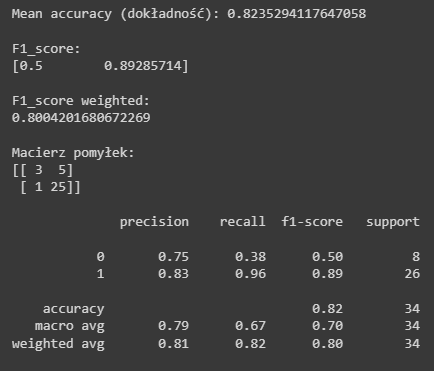

Z **PCA** 0,9 wariancji model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='rbf', C=1.7, gamma='auto'))


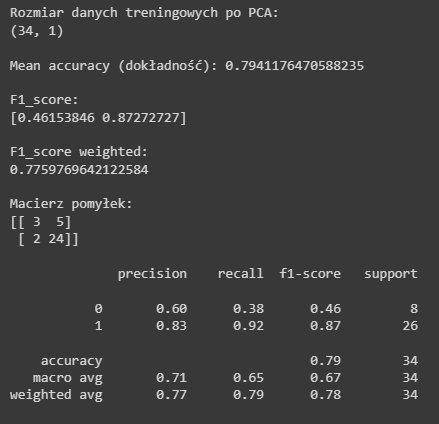

Bez **PCA**, wszystkie cechy model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='rbf', C=1.7, gamma='auto'))

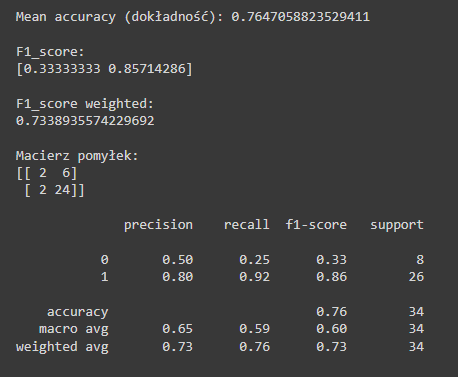

Bez PCA, wszystkie cechy
model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='rbf', C=1.7, gamma='auto'))

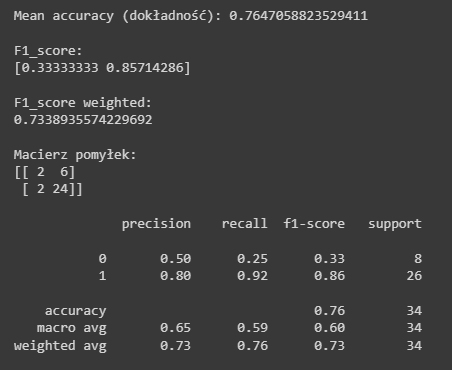

Z PCA 0,9 wariancji model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='linear', C=1.7, gamma='auto'))

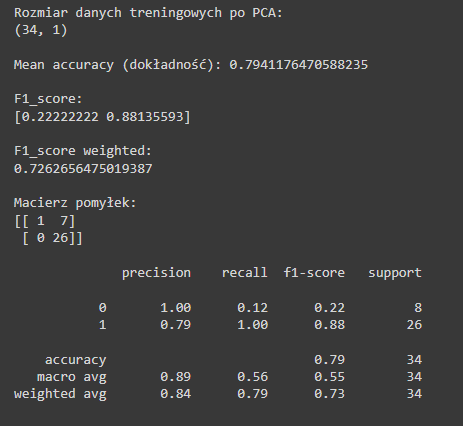

Bez PCA, wszystkie cechy model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='sigmoid', C=1.7, gamma='auto'))

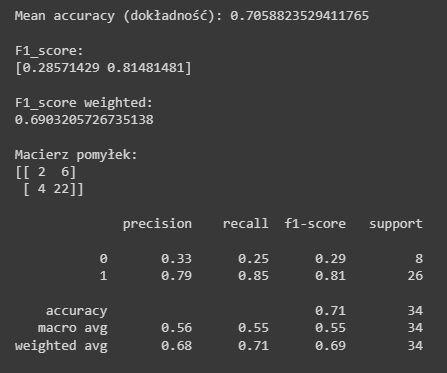

Z PCA 0,9 wariancji model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='poly', C=1.7, gamma='auto'))

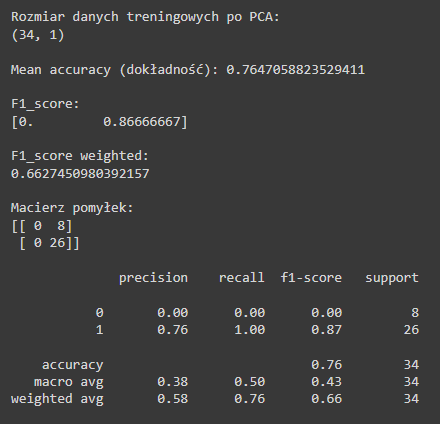

Bez PCA, wszystkie cechy model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='poly', C=1.7, gamma='auto'))

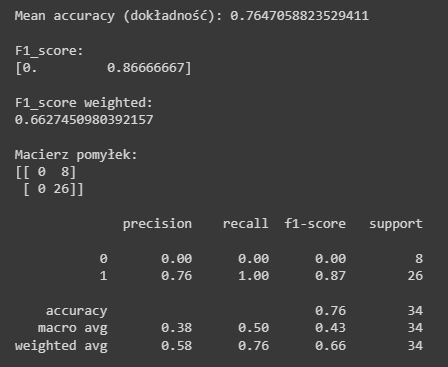

Z PCA 0,9 wariancji model = make_pipeline(StandardScaler(), SVC(decision_function_shape='ovo', kernel='sigmoid', C=1.7, gamma='auto'))

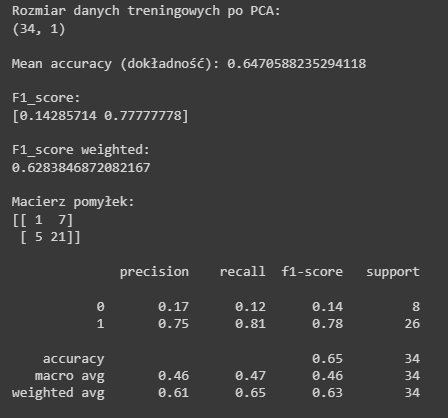